In [3]:
from pyiso import client_factory
import datetime
import matplotlib.pyplot as plt

In [4]:
caiso = client_factory('CAISO')

In [5]:
start_date = datetime.datetime(2018, 10, 23)
end_date = datetime.datetime(2018, 10, 24)
gen = caiso.get_generation(start_at=start_date, end_at=end_date)
load = caiso.get_load(start_at=start_date, end_at=end_date)
trade = caiso.get_trade(start_at=start_date, end_at=end_date)

In [6]:
gen

[{'ba_name': 'CAISO',
  'freq': '1hr',
  'fuel_name': 'wind',
  'gen_MW': 1518.52,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 10, 23, 7, 0, tzinfo=<UTC>)},
 {'ba_name': 'CAISO',
  'freq': '1hr',
  'fuel_name': 'solar',
  'gen_MW': 0.0,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 10, 23, 7, 0, tzinfo=<UTC>)},
 {'ba_name': 'CAISO',
  'freq': '1hr',
  'fuel_name': 'wind',
  'gen_MW': 1458.0,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 10, 23, 8, 0, tzinfo=<UTC>)},
 {'ba_name': 'CAISO',
  'freq': '1hr',
  'fuel_name': 'solar',
  'gen_MW': 0.0,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 10, 23, 8, 0, tzinfo=<UTC>)},
 {'ba_name': 'CAISO',
  'freq': '1hr',
  'fuel_name': 'wind',
  'gen_MW': 1428.15,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 10, 23, 9, 0, tzinfo=<UTC>)},
 {'ba_name': 'CAISO',
  'freq': '1hr',
  'fuel_name': 'solar',
  'gen_MW': 0.0,
  'market': 'DAHR',
  'timestamp': datetime.datetime(2018, 10, 23, 

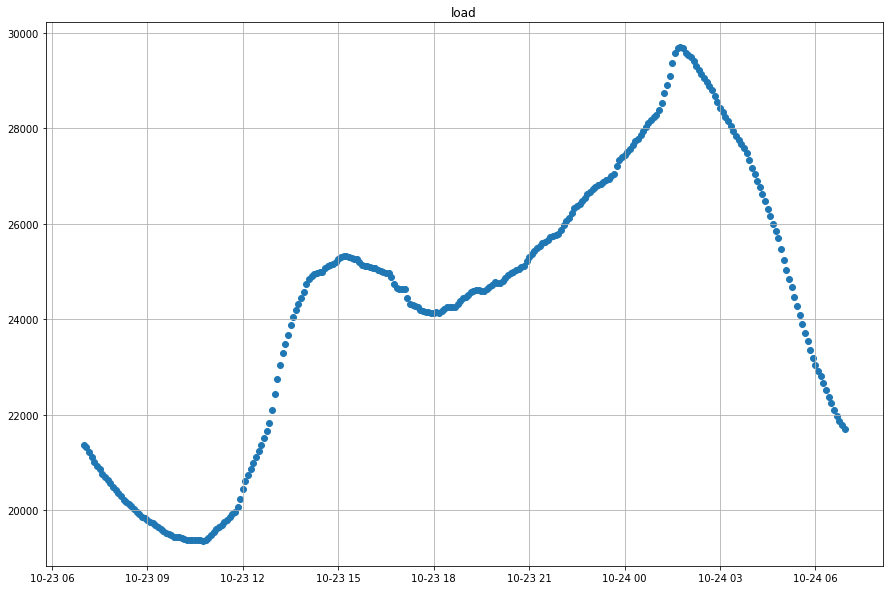

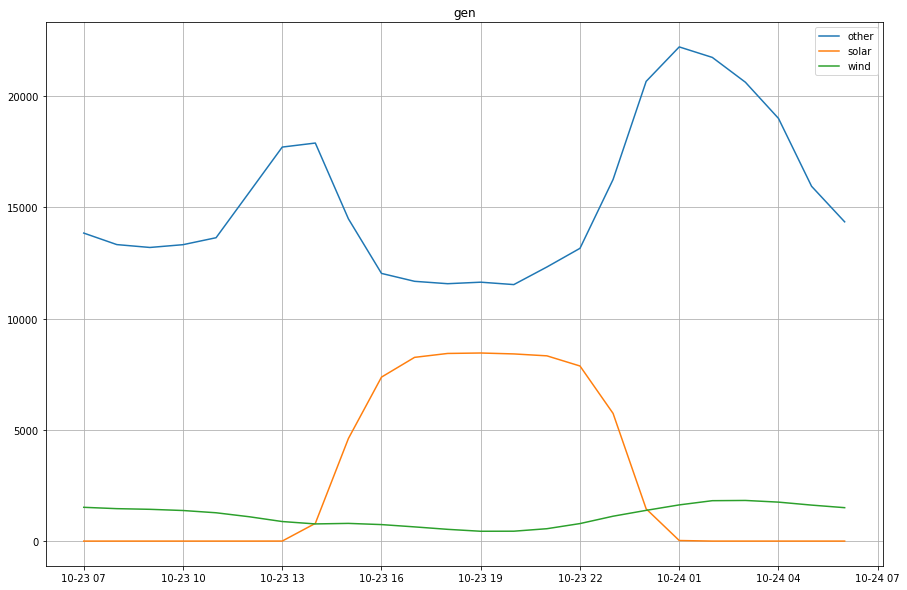

In [8]:
x_load = []
load_list = []
gen_solar_list = []
gen_wind_list = []
gen_other_list = []
x_solar_gen = []
x_wind_gen = []
x_other_gen = []

for l in load:
    x_load.append(l['timestamp'])
    load_list.append(l['load_MW'])
    

for g in gen:
    if g['fuel_name'] == 'wind':
        x_wind_gen.append(g['timestamp'])
        gen_wind_list.append(g['gen_MW'])
    if g['fuel_name'] == 'solar':
        x_solar_gen.append(g['timestamp'])
        gen_solar_list.append(g['gen_MW'])
    if g['fuel_name'] == 'other':
        x_other_gen.append(g['timestamp'])
        gen_other_list.append(g['gen_MW'])
        
plt.figure(figsize=(15, 10)) 
plt.scatter(x_load, load_list)
plt.title('load')
plt.grid()

plt.savefig('load.png')

plt.figure(figsize=(15, 10)) 
plt.plot(x_other_gen, gen_other_list, label='other')
plt.plot(x_solar_gen, gen_solar_list, label='solar')
plt.plot(x_wind_gen, gen_wind_list, label='wind')
plt.title('gen')
plt.legend()
plt.grid()

plt.savefig('gen.png')